In [1]:
# modules import
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Open data
# file path
netCDF_NEMO_fileT = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fonte_iceshelf/NETCDF_MELT_PTCD_TEMP.nc'
netCDF_NEMO_fileP = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fonte_iceshelf/NETCDF_MELT_PTCD_PREC.nc'
netCDF_NEMO_fileW = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fonte_iceshelf/NETCDF_MELT_PTCD_WIND.nc'
# open files 
SBCT = xr.open_mfdataset(netCDF_NEMO_fileT)
SBCP = xr.open_mfdataset(netCDF_NEMO_fileP)
SBCW = xr.open_mfdataset(netCDF_NEMO_fileW)
# saved file path
saved_file = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/RESULTS/monthly_melt_ARTPT.pdf'

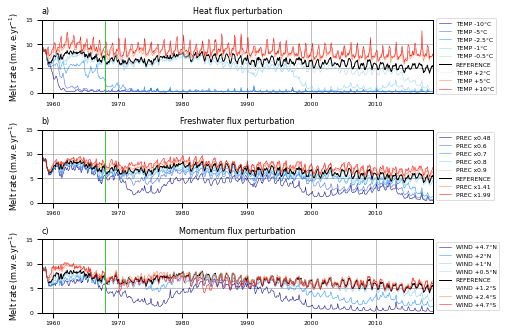

In [3]:
sns.set_context('paper')

# Surface of iceshelves
SThwaites = 4650261338.879133
SPineIsland = 6362318976.695184

## figure
f = plt.figure(figsize = (7.08, 4.72))
ax={}
nb_rows = 3
nb_cols = 1

# legend and colorbar
b_WIND = ['WIND +4.7°N', 'WIND +2°N', 'WIND +1°N', 'WIND +0.5°N', 'REFERENCE', 'WIND +1.2°S', 'WIND +2.4°S', 'WIND +4.7°S']
b_PREC = ['PREC x0.48', 'PREC x0.6', 'PREC x0.7', 'PREC x0.8', 'PREC x0.9', 'REFERENCE', 'PREC x1.41', 'PREC x1.99']
b_TEMP = ['TEMP -10°C', 'TEMP -5°C', 'TEMP -2.5°C', 'TEMP -1°C', 'TEMP -0.5°C', 'REFERENCE', 'TEMP +2°C', 'TEMP +5°C', 'TEMP +10°C']
color_TEMP = ['darkblue', 'royalblue', 'dodgerblue', 'lightskyblue', 'lightblue', 'black', 'mistyrose', 'coral', 'red']
color_PREC = ['darkblue', 'royalblue', 'dodgerblue', 'lightskyblue', 'lightblue', 'black', 'coral', 'red']
color_WIND = ['darkblue', 'dodgerblue', 'lightskyblue', 'lightblue', 'black', 'mistyrose', 'coral', 'red']

#limit of xaxis
x = [datetime.date(1958, 3, 1), datetime.date(2019, 1, 1)] 

# plot melt rate for the various perturbations
simulations=['TEMP','PREC','WIND'] 
k = 0
for s in simulations:
    k = k + 1
    if s =='TEMP':
        colors = color_TEMP
        b = b_TEMP
    elif s =='PREC':
        colors = color_PREC
        b = b_PREC
    else :
        colors = color_WIND
        b = b_WIND
    netCDF_NEMO_file = f"/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fonte_iceshelf/NETCDF_MELT_PTCD_{s}.nc"
    SBC = xr.open_mfdataset(netCDF_NEMO_file)
    SBC['year']=SBC.time.dt.year
    ax[k] = f.add_subplot(nb_rows,nb_cols, k)
    for j in np.arange(0, SBC['num'].size, 1):
        SBC0 = SBC.melt[0, :, j]
        if colors[j]=='black':
            ax[k].plot(SBC0.time, SBC0 * 10**12 / 1000 / (SThwaites + SPineIsland), linewidth = 1, color= colors[j], label = b[j]) # reference case is thicker
        else:
            ax[k].plot(SBC0.time, SBC0 * 10**12 / 1000 / (SThwaites + SPineIsland), linewidth = 0.5, color= colors[j], label = b[j])
        ax[k].set_ylabel('Melt rate (m.w.e.yr$^{-1}$)', fontsize=8)
        if k==1:
            ax[k].set_title('Heat flux perturbation', fontsize=8)
            ax[k].set_title('a)', fontsize=8, loc='left')
        if k==2:
            ax[k].set_title('Freshwater flux perturbation', fontsize=8)
            ax[k].set_title('b)', fontsize=8, loc='left')
        if k==3:
            ax[k].set_title('Momentum flux perturbation', fontsize=8)
            ax[k].set_title('c)', fontsize=8, loc='left')
        # add label
        ax[k].set_ylim(0,15)
        ax[k].set_xlim(x[0], x[1])
        plt.xticks(fontsize=6)
        plt.yticks(fontsize=6)
        box = ax[k].get_position()
        ax[k].set_position([box.x0, box.y0, box.width * 0.8, box.height])
        # Put a legend to the right of the current axi
        ax[k].legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={"size":6})
        plt.axvline(pd.Timestamp('1968-01-15'),linewidth = 0.7, color='limegreen')
        plt.grid(True)
        
        plt.tight_layout()
# save figure
plt.savefig(saved_file)